In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
#read xcel data sheets
dfK27 = pd.read_excel('onerowperGene.xlsx',sheet_name='H3K27ac')
dfK27 = pd.read_excel('onerowperGene.xlsx',sheet_name='H3K27ac')

dfK27

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,CV_mean,CV_pvalue,CV_qvalue,CV_fdr_BH,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH
0,chr1_4783354_4786691,chr1,4783354,4786691,6,4785726,4787726,Mrpl15,-,0,...,114.089159,0.093101,0.003229,0.173218,34.086610,2.050004,116.162149,0.819991,0.541445,0.894427
1,chr1_4806851_4810880,chr1,4806851,4810880,8,4805893,4807893,Lypla1,+,0,...,166.949631,0.021068,0.001695,0.090922,47.479721,1.579616,170.670270,0.780949,0.541445,0.894427
2,chr1_4856717_4859940,chr1,4856717,4859940,10,4855694,4857694,Tcea1,+,0,...,91.454961,0.014497,0.001438,0.077117,33.971186,1.696392,104.346860,0.792047,0.541445,0.894427
3,chr1_5082619_5084238,chr1,5082619,5084238,11,5081173,5083173,Atp6v1h,+,0,...,57.465463,0.148038,0.004133,0.221697,26.101534,1.652721,68.630315,0.788018,0.541445,0.894427
4,chr1_6212000_6216172,chr1,6212000,6216172,12,6212662,6214662,Rb1cc1,+,0,...,175.482119,0.266460,0.006049,0.324483,58.139164,2.250920,187.051021,0.832731,0.541445,0.894427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,chrY_897024_899312,chrY,897024,899312,18473,895788,897788,Kdm5d,+,0,...,53.830874,0.126947,0.003789,0.203274,21.941009,2.162271,61.059591,0.827354,0.541445,0.894427
9970,chrY_1009656_1011591,chrY,1009656,1011591,18474,1008612,1010612,Eif2s3y,+,0,...,53.696796,0.004882,0.000883,0.047393,20.064424,2.968478,62.517343,0.864981,0.541445,0.894427
9971,chrY_1244352_1245927,chrY,1244352,1245927,18475,1245738,1247738,Uty,-,0,...,49.656562,0.296843,0.006531,0.350374,11.748068,2.036476,46.280352,0.819059,0.541445,0.894427
9972,chrY_1285191_1287046,chrY,1285191,1287046,18476,1286613,1288613,Ddx3y,-,0,...,55.731968,0.023646,0.001787,0.095869,21.757332,2.970162,61.205830,0.865037,0.541445,0.894427


In [3]:
#filter out the data based on CV p-value
#thep-value in metacycle result represent the periodicity of the data. (whether the genes are rhythmic or not) And indirectly corresponds to reliability of amplitude value
# dfK27 = dfK27[dfK27['CV_pvalue'] < 0.05]
# dfK27

In [4]:
#add relative amplitude values
dfK27['CV_rAMP'] = dfK27['CV_amplitude'] / dfK27['CV_mean']
dfK27['GF_rAMP'] = dfK27['GF_amplitude'] / dfK27['GF_mean']


#get relative amplitude fold change and difference between GF and CV

dfK27['rAMP_fold_diff'] = dfK27['CV_rAMP'] / dfK27['GF_rAMP']
dfK27['rAMP_diff'] = dfK27['CV_rAMP'] - dfK27['GF_rAMP']

dfK27

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
0,chr1_4783354_4786691,chr1,4783354,4786691,6,4785726,4787726,Mrpl15,-,0,...,34.086610,2.050004,116.162149,0.819991,0.541445,0.894427,0.205833,0.293440,0.701450,-0.087607
1,chr1_4806851_4810880,chr1,4806851,4810880,8,4805893,4807893,Lypla1,+,0,...,47.479721,1.579616,170.670270,0.780949,0.541445,0.894427,0.262675,0.278196,0.944208,-0.015521
2,chr1_4856717_4859940,chr1,4856717,4859940,10,4855694,4857694,Tcea1,+,0,...,33.971186,1.696392,104.346860,0.792047,0.541445,0.894427,0.288087,0.325560,0.884897,-0.037473
3,chr1_5082619_5084238,chr1,5082619,5084238,11,5081173,5083173,Atp6v1h,+,0,...,26.101534,1.652721,68.630315,0.788018,0.541445,0.894427,0.266724,0.380321,0.701313,-0.113597
4,chr1_6212000_6216172,chr1,6212000,6216172,12,6212662,6214662,Rb1cc1,+,0,...,58.139164,2.250920,187.051021,0.832731,0.541445,0.894427,0.174843,0.310820,0.562523,-0.135977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,chrY_897024_899312,chrY,897024,899312,18473,895788,897788,Kdm5d,+,0,...,21.941009,2.162271,61.059591,0.827354,0.541445,0.894427,0.287646,0.359338,0.800489,-0.071692
9970,chrY_1009656_1011591,chrY,1009656,1011591,18474,1008612,1010612,Eif2s3y,+,0,...,20.064424,2.968478,62.517343,0.864981,0.541445,0.894427,0.323812,0.320942,1.008943,0.002870
9971,chrY_1244352_1245927,chrY,1244352,1245927,18475,1245738,1247738,Uty,-,0,...,11.748068,2.036476,46.280352,0.819059,0.541445,0.894427,0.233750,0.253846,0.920835,-0.020096
9972,chrY_1285191_1287046,chrY,1285191,1287046,18476,1286613,1288613,Ddx3y,-,0,...,21.757332,2.970162,61.205830,0.865037,0.541445,0.894427,0.319367,0.355478,0.898415,-0.036111


In [5]:
#get the unique list of genes for hdac3, nfil3, and nr1d1
df_hdac3 = pd.read_csv('hdac3_dep_geneID.txt', header=None)
df_nfil3 = pd.read_csv('nfil3_dep_geneID.txt', header=None)
df_nr1d1 = pd.read_csv('nr1d1_dep_geneID.txt', header=None)

hdac3 = set(df_hdac3[0])
nfil3 = set(df_nfil3[0])
nr1d1 = set(df_nr1d1[0])

uniq_hdac3 = hdac3 - nfil3 - nr1d1
uniq_nfil3 = nfil3 - hdac3 - nr1d1
uniq_nr1d1 = nr1d1 - hdac3 - nfil3

print(len(uniq_hdac3)) #there should be 600 genes for the uniq gene list of hdac3

600


In [6]:
#filter the excel data sheet according to the unique gene list
#for each row in the excel sheet data, if the gene is in the unique gene list, keep it
dfK27_hdac3 = dfK27[dfK27['gene'].isin(uniq_hdac3)]
dfK27_nfil3 = dfK27[dfK27['gene'].isin(uniq_nfil3)]
dfK27_nr1d1 = dfK27[dfK27['gene'].isin(uniq_nr1d1)]

#each dataframe contains the rows corresponding to the regulator
dfK27_hdac3

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
18,chr1_16102805_16107491,chr1,16102805,16107491,33,16103882,16105882,Rdh10,+,0,...,70.268887,1.749338,209.189382,0.796746,0.541445,0.894427,0.270583,0.335910,0.805520,-0.065328
73,chr1_40679920_40685203,chr1,40679920,40685203,141,40679712,40681712,Slc9a2,+,0,...,74.544485,1.041533,205.297700,0.713652,0.541445,0.894427,0.159249,0.363104,0.438577,-0.203855
85,chr1_45924994_45926509,chr1,45924994,45926509,177,45925594,45927594,Slc40a1,-,0,...,15.207000,2.829006,43.559125,0.391886,0.541445,0.894427,0.140798,0.349112,0.403302,-0.208314
92,chr1_52630632_52631299,chr1,52630632,52631299,191,52628705,52630705,Tmem194b,+,0,...,7.534458,2.379171,16.914602,0.839883,0.541445,0.894427,0.273665,0.445441,0.614369,-0.171776
96,chr1_52952154_52953294,chr1,52952154,52953294,199,52952840,52954840,1700019D03Rik,-,0,...,14.486944,1.147802,41.279456,0.729406,0.541445,0.894427,0.184797,0.350948,0.526566,-0.166151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,chrX_140598058_140600156,chrX,140598058,140600156,18405,140600522,140602522,Tsc22d3,-,367,...,16.511460,3.329634,35.784050,0.446736,0.541445,0.894427,0.348745,0.461420,0.755808,-0.112675
9937,chrX_151519644_151522572,chrX,151519644,151522572,18418,151518672,151520672,Phf8,+,0,...,39.723659,1.252768,104.875805,0.743663,0.541445,0.894427,0.285454,0.378769,0.753636,-0.093315
9940,chrX_152015601_152017808,chrX,152015601,152017808,18421,152014428,152016428,Smc1a,+,0,...,23.603576,1.050541,53.135129,0.715042,0.541445,0.894427,0.299190,0.444218,0.673521,-0.145028
9955,chrX_162887504_162888503,chrX,162887504,162888503,18438,162888462,162890462,Syap1,-,0,...,13.210796,3.152681,46.267521,0.870729,0.541445,0.894427,0.370091,0.285531,1.296150,0.084560


In [7]:
# #this saving is for the phase plotting
# dfK27_hdac3.to_csv('K27_hdac3.csv',sep="\t")
# dfK27_nfil3.to_csv('K27_nfil3.csv',sep="\t")
# dfK27_nr1d1.to_csv('K27_nr1d1.csv',sep="\t")

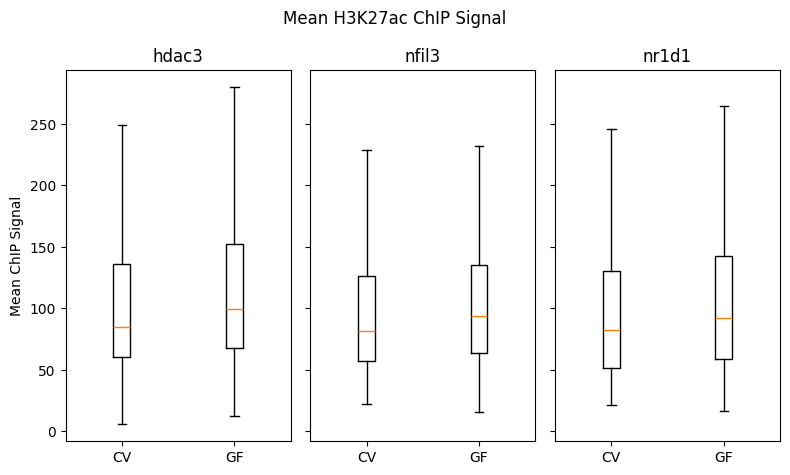

hdac3 t test p-val is 0.008653416838086231 and t-val is -2.6318146665951816
nfil3 t test p-val is 0.0401552266611423 and t-val is -2.0575309684373826
nr1d1 t test p-val is 0.00130359501641984 and t-val is -3.2231710660982507

median CV 84.9134194123 and median GF 99.4515268355
median CV 81.71509003345 and median GF 93.95045212970001
median CV 82.4818387314 and median GF 91.8861909497


In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

hdac3_mean_CVGF = [dfK27_hdac3['CV_mean'],dfK27_hdac3['GF_mean']]
nfil3_mean_CVGF = [dfK27_nfil3['CV_mean'],dfK27_nfil3['GF_mean']]
nr1d1_mean_CVGF = [dfK27_nr1d1['CV_mean'],dfK27_nr1d1['GF_mean']]

lab_CVGF = ['CV','GF']


ax1.boxplot(hdac3_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax1.set_title('hdac3')
ax1.set_ylabel('Mean ChIP Signal')

ax2.boxplot(nfil3_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax2.set_title('nfil3')

ax3.boxplot(nr1d1_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax3.set_title('nr1d1')

fig.suptitle('Mean H3K27ac ChIP Signal')
fig.set_figwidth(8)
plt.tight_layout()
plt.show()

regulators = ['hdac3','nfil3','nr1d1']
reg_means = [hdac3_mean_CVGF,nfil3_mean_CVGF,nr1d1_mean_CVGF]
for i in range(3):
    t,p = stats.ttest_ind(reg_means[i][0],reg_means[i][1])
    print(regulators[i],'t test p-val is', p, 'and t-val is',t)

print('')

for i in range(3):
    CV,GF = (reg_means[i][0].median(),reg_means[i][1].median())
    print('median CV', CV,'and median GF',GF)


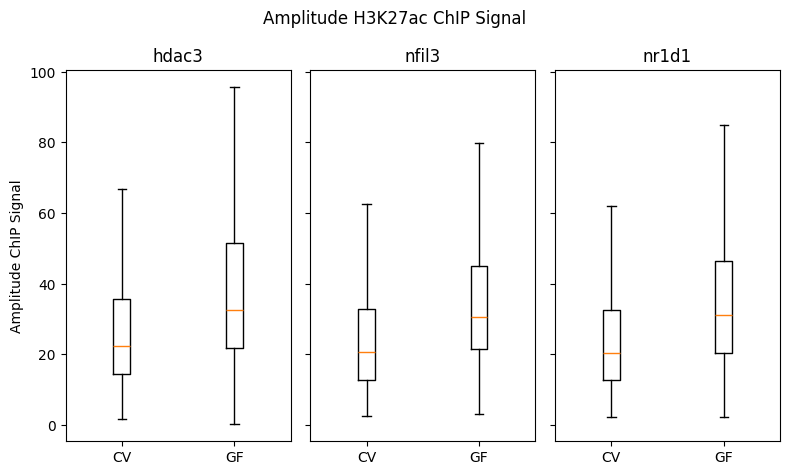

4.596048638618584e-16
hdac3 t test p-val is 4.596048638618584e-16 and t-val is -8.291281253991576
nfil3 t test p-val is 4.311507142523141e-11 and t-val is -6.742979947586874
nr1d1 t test p-val is 1.676467308111908e-25 and t-val is -10.693118301317579

median CV 22.3347921544 and median GF 32.4194728666
median CV 20.579456021200002 and median GF 30.6078279105
median CV 20.2610241496 and median GF 31.1391512335


In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

hdac3_amplitude_CVGF = [dfK27_hdac3['CV_amplitude'], dfK27_hdac3['GF_amplitude']]
nfil3_amplitude_CVGF = [dfK27_nfil3['CV_amplitude'], dfK27_nfil3['GF_amplitude']]
nr1d1_amplitude_CVGF = [dfK27_nr1d1['CV_amplitude'], dfK27_nr1d1['GF_amplitude']]

lab_CVGF = ['CV', 'GF']

ax1.boxplot(hdac3_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax1.set_title('hdac3')
ax1.set_ylabel('Amplitude ChIP Signal')

ax2.boxplot(nfil3_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax2.set_title('nfil3')

ax3.boxplot(nr1d1_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax3.set_title('nr1d1')

fig.suptitle('Amplitude H3K27ac ChIP Signal')
fig.set_figwidth(8)
plt.tight_layout()
plt.show()


t, p = stats.ttest_ind(hdac3_amplitude_CVGF[0],hdac3_amplitude_CVGF[1])
print(p)

reg_amps = [hdac3_amplitude_CVGF,nfil3_amplitude_CVGF,nr1d1_amplitude_CVGF]
for i in range(3):
    t,p = stats.ttest_ind(reg_amps[i][0],reg_amps[i][1])
    print(regulators[i],'t test p-val is', p, 'and t-val is',t)

print('')

for i in range(3):
    CV,GF = (reg_amps[i][0].median(),reg_amps[i][1].median())
    print('median CV', CV,'and median GF',GF)

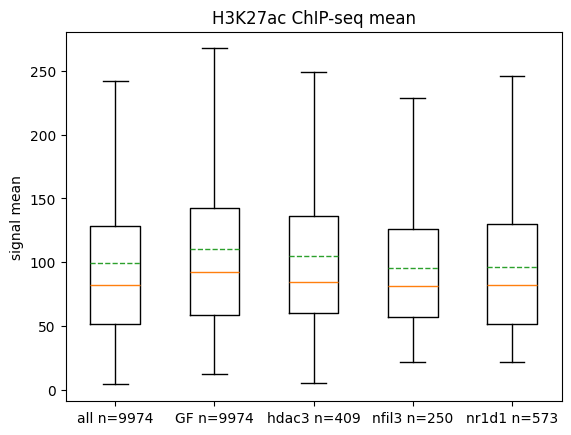

In [10]:
#put mean data in list - K27
df9_mean_all = dfK27['CV_mean']
df9_mean_GF = dfK27['GF_mean']
df9_mean_hdac3 = dfK27_hdac3['CV_mean']
df9_mean_nfil3 = dfK27_nfil3['CV_mean']
df9_mean_nr1d1 = dfK27_nr1d1['CV_mean']

#getting sample size for labeling
lendf = len(df9_mean_all)
lenhdac3 = len(df9_mean_hdac3)
lennfil3 = len(df9_mean_nfil3)
lennr1d1 = len(df9_mean_nr1d1)

df9means = [df9_mean_all,df9_mean_GF, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'GF n='+str(lendf),'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K27ac ChIP-seq mean')
plt.show()



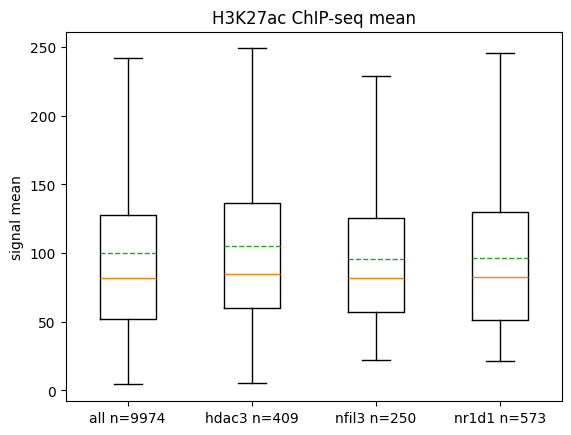

hdac3 n=409 t-test p-val is 0.17098379956549664 and t val is -1.369144281438643
nfil3 n=250 t-test p-val is 0.3984900920828115 and t val is 0.8443563040983082
nr1d1 n=573 t-test p-val is 0.308322693129851 and t val is 1.0187970636840138

all n=9974 median is 82.03368221644999
hdac3 n=409 median is 84.9134194123
nfil3 n=250 median is 81.71509003345
nr1d1 n=573 median is 82.4818387314

hdac3 nfil3 t-val 1.8435117938074124 p-val 0.06570450635468829
hdac3 nr1d1 t-val 2.095627553366064 p-val 0.036371323044724825
nfil3 nr1d1 t-val -0.17905240893603255 p-val 0.8579407268064613


In [11]:
#mean data in list - K27

df9_mean_all = dfK27['CV_mean']
df9_mean_hdac3 = dfK27_hdac3['CV_mean']
df9_mean_nfil3 = dfK27_nfil3['CV_mean']
df9_mean_nr1d1 = dfK27_nr1d1['CV_mean']

df9means = [df9_mean_all, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K27ac ChIP-seq mean')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_mean_all,df9means[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9means[i].median()
    print(df9_label[i],'median is',med)
print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_mean_hdac3,df9_mean_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_mean_hdac3,df9_mean_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_mean_nfil3,df9_mean_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)

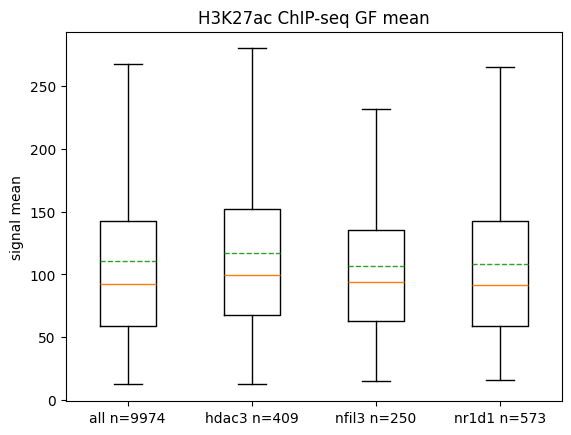

hdac3 n=409 t-test p-val is 0.07826014890909946 and t val is -1.7610454445442212
nfil3 n=250 t-test p-val is 0.3778774372610988 and t val is 0.881852268511662
nr1d1 n=573 t-test p-val is 0.4647480908585726 and t val is 0.7310774502394689

all n=9974 median is 92.7633690927
hdac3 n=409 median is 99.4515268355
nfil3 n=250 median is 93.95045212970001
nr1d1 n=573 median is 91.8861909497


In [12]:
#GF comparison
#mean data in list - K27
df9_mean_all = dfK27['GF_mean']
df9_mean_hdac3 = dfK27_hdac3['GF_mean']
df9_mean_nfil3 = dfK27_nfil3['GF_mean']
df9_mean_nr1d1 = dfK27_nr1d1['GF_mean']

df9means = [df9_mean_all, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K27ac ChIP-seq GF mean')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_mean_all,df9means[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9means[i].median()
    print(df9_label[i],'median is',med)

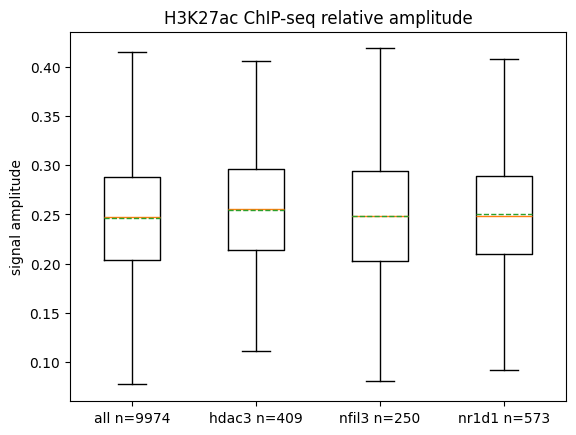

hdac3 n=409 t-test p-val is 0.013317453276007684 and t val is -2.47559013317869
nfil3 n=250 t-test p-val is 0.5655317997023201 and t val is -0.5746631216492639
nr1d1 n=573 t-test p-val is 0.12197102875558671 and t val is -1.5466775464737135

all n=9974 median is 0.2478434221203309
hdac3 n=409 median is 0.2555606416533152
nfil3 n=250 median is 0.24807841048347787
nr1d1 n=573 median is 0.24812055689884663

hdac3 nfil3 t-val 1.1820144884304715 p-val 0.23762758127923306
hdac3 nr1d1 t-val 0.988370826584435 p-val 0.32321502906465394
nfil3 nr1d1 t-val -0.408997690379002 p-val 0.6826480236454718


In [13]:
#amplitude data in list - K27
df9_amplitude_all = dfK27['CV_rAMP']
df9_amplitude_hdac3 = dfK27_hdac3['CV_rAMP']
df9_amplitude_nfil3 = dfK27_nfil3['CV_rAMP']
df9_amplitude_nr1d1 = dfK27_nr1d1['CV_rAMP']

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K27ac ChIP-seq relative amplitude')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)


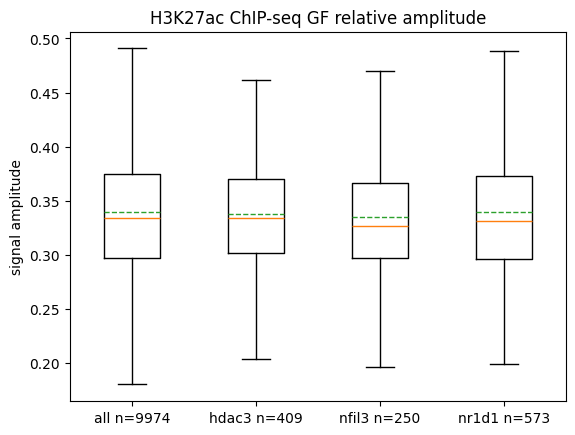

hdac3 n=409 t-test p-val is 0.5909696334699301 and t val is 0.5374481177282147
nfil3 n=250 t-test p-val is 0.24202198089136392 and t val is 1.1700155712502547
nr1d1 n=573 t-test p-val is 0.9029766916630455 and t val is 0.12190485727540198

all n=9974 median is 0.33353880308577744
hdac3 n=409 median is 0.3337902447056782
nfil3 n=250 median is 0.3269379799913077
nr1d1 n=573 median is 0.3310495024085098


In [14]:
#amplitude data in list - K27
df9_amplitude_all = dfK27['GF_rAMP']
df9_amplitude_hdac3 = dfK27_hdac3['GF_rAMP']
df9_amplitude_nfil3 = dfK27_nfil3['GF_rAMP']
df9_amplitude_nr1d1 = dfK27_nr1d1['GF_rAMP']

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K27ac ChIP-seq GF relative amplitude')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

In [15]:
dfK27

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
0,chr1_4783354_4786691,chr1,4783354,4786691,6,4785726,4787726,Mrpl15,-,0,...,34.086610,2.050004,116.162149,0.819991,0.541445,0.894427,0.205833,0.293440,0.701450,-0.087607
1,chr1_4806851_4810880,chr1,4806851,4810880,8,4805893,4807893,Lypla1,+,0,...,47.479721,1.579616,170.670270,0.780949,0.541445,0.894427,0.262675,0.278196,0.944208,-0.015521
2,chr1_4856717_4859940,chr1,4856717,4859940,10,4855694,4857694,Tcea1,+,0,...,33.971186,1.696392,104.346860,0.792047,0.541445,0.894427,0.288087,0.325560,0.884897,-0.037473
3,chr1_5082619_5084238,chr1,5082619,5084238,11,5081173,5083173,Atp6v1h,+,0,...,26.101534,1.652721,68.630315,0.788018,0.541445,0.894427,0.266724,0.380321,0.701313,-0.113597
4,chr1_6212000_6216172,chr1,6212000,6216172,12,6212662,6214662,Rb1cc1,+,0,...,58.139164,2.250920,187.051021,0.832731,0.541445,0.894427,0.174843,0.310820,0.562523,-0.135977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,chrY_897024_899312,chrY,897024,899312,18473,895788,897788,Kdm5d,+,0,...,21.941009,2.162271,61.059591,0.827354,0.541445,0.894427,0.287646,0.359338,0.800489,-0.071692
9970,chrY_1009656_1011591,chrY,1009656,1011591,18474,1008612,1010612,Eif2s3y,+,0,...,20.064424,2.968478,62.517343,0.864981,0.541445,0.894427,0.323812,0.320942,1.008943,0.002870
9971,chrY_1244352_1245927,chrY,1244352,1245927,18475,1245738,1247738,Uty,-,0,...,11.748068,2.036476,46.280352,0.819059,0.541445,0.894427,0.233750,0.253846,0.920835,-0.020096
9972,chrY_1285191_1287046,chrY,1285191,1287046,18476,1286613,1288613,Ddx3y,-,0,...,21.757332,2.970162,61.205830,0.865037,0.541445,0.894427,0.319367,0.355478,0.898415,-0.036111


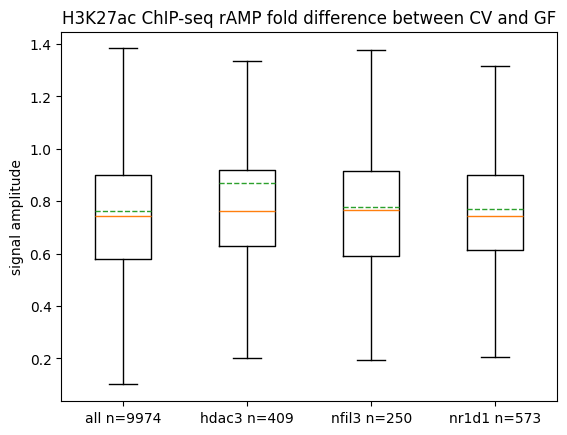

hdac3 n=409 t-test p-val is 0.00021015795003068296 and t val is -3.707798209954265
nfil3 n=250 t-test p-val is 0.586669978077639 and t val is -0.5436851961358244
nr1d1 n=573 t-test p-val is 0.7782584609810707 and t val is -0.28159648543723903

all n=9974 median is 0.7423599032204596
hdac3 n=409 median is 0.7644102610406726
nfil3 n=250 median is 0.7665581897837488
nr1d1 n=573 median is 0.7455256621400929

hdac3 nfil3 t-val 0.8072688209436744 p-val 0.41980377476285846
hdac3 nr1d1 t-val 1.355696184495359 p-val 0.1755081781953374
nfil3 nr1d1 t-val 0.509072913639339 p-val 0.6108379020003738


In [16]:
#amplitude data in list - K27
col = 'rAMP_fold_diff'
df9_amplitude_all = dfK27[col]
df9_amplitude_hdac3 = dfK27_hdac3[col]
df9_amplitude_nfil3 = dfK27_nfil3[col]
df9_amplitude_nr1d1 = dfK27_nr1d1[col]

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K27ac ChIP-seq rAMP fold difference between CV and GF')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)

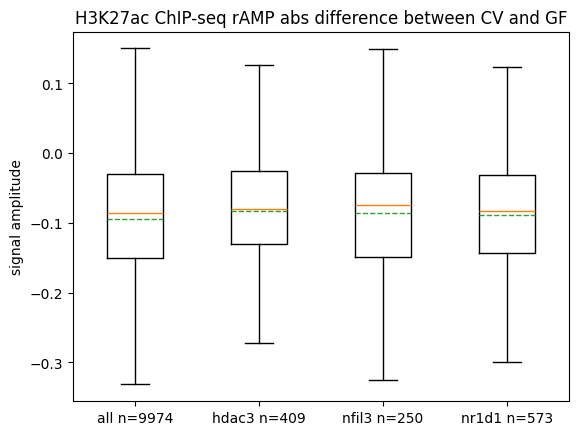

hdac3 n=409 t-test p-val is 0.04257425944063621 and t val is -2.02811242474225
nfil3 n=250 t-test p-val is 0.2305686973360767 and t val is -1.1989666737245215
nr1d1 n=573 t-test p-val is 0.2636005147376799 and t val is -1.1179811458092674

all n=9974 median is -0.08619929383853325
hdac3 n=409 median is -0.08005129398060545
nfil3 n=250 median is -0.07389590169501692
nr1d1 n=573 median is -0.08248054500092966

hdac3 nfil3 t-val 0.3302132697756039 p-val 0.7413440869925001
hdac3 nr1d1 t-val 0.8913790890352615 p-val 0.3729446264115407
nfil3 nr1d1 t-val 0.39309307367476076 p-val 0.6943527878180336


In [17]:
#amplitude data in list - K27
col = 'rAMP_diff'
df9_amplitude_all = dfK27[col]
df9_amplitude_hdac3 = dfK27_hdac3[col]
df9_amplitude_nfil3 = dfK27_nfil3[col]
df9_amplitude_nr1d1 = dfK27_nr1d1[col]

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K27ac ChIP-seq rAMP abs difference between CV and GF')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)